In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import itertools
from sklearn import preprocessing
%matplotlib inline

In [2]:
csv_collision = pd.read_csv('Data-collisions.csv')

/opt/anaconda3/envs/env2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.DataFrame(csv_collision)
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [4]:
df2 = df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SDOT_COLCODE',
        'SEGLANEKEY', 'CROSSWALKKEY', 'REPORTNO', 'INCDTTM',
       'SEGLANEKEY', 'CROSSWALKKEY', 'LOCATION','SDOTCOLNUM', 'STATUS', 'SEVERITYCODE.1','ST_COLCODE', 'ST_COLDESC'  ], axis=1)

In [5]:
df2[['INATTENTIONIND']] = df2[['INATTENTIONIND']].replace(np.nan,'N',regex=True)
df2[['UNDERINFL']] = df2[['UNDERINFL']].replace('0','N',regex=True)
df2[['UNDERINFL']] = df2[['UNDERINFL']].replace('1','Y',regex=True)
df2[['UNDERINFL']] = df2[['UNDERINFL']].replace(np.nan,'N',regex=True)
df2[['PEDROWNOTGRNT']] = df2[['PEDROWNOTGRNT']].replace(np.nan,'N',regex=True)
df2[['SPEEDING']] = df2[['SPEEDING']].replace(np.nan,'N',regex=True)
df2[['JUNCTIONTYPE']] = df2[['JUNCTIONTYPE']].replace(np.nan,'Unknown',regex=True)

In [6]:
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
df2

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,N,Overcast,Wet,Daylight,N,N,N
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,N,Raining,Wet,Dark - Street Lights On,N,N,N
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,N,Overcast,Dry,Daylight,N,N,N
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,N,Clear,Dry,Daylight,N,N,N
4,2,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,N,Raining,Wet,Daylight,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187499,2,Block,Injury Collision,Head On,3,0,0,2,2018/11/12 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,N,Clear,Dry,Daylight,N,N,N
187500,1,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Raining,Wet,Daylight,N,N,N
187501,2,Intersection,Injury Collision,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,N,Clear,Dry,Daylight,N,N,N
187502,2,Intersection,Injury Collision,Cycles,2,0,1,1,2019/01/15 00:00:00+00,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,N,N,Clear,Dry,Dusk,N,N,N


In [7]:
df2.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
JUNCTIONTYPE      object
SDOT_COLDESC      object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
HITPARKEDCAR      object
dtype: object

In [8]:
df2[['INCDATE']] = pd.to_datetime((df2['INCDATE']), format= "%Y-%m-%d")
df2['DAY_OF_WEEK'] = df2['INCDATE'].dt.day_name()
df2['YEAR'] = pd.DatetimeIndex(df2['INCDATE']).year
df2['WEEKDAY'] = pd.to_datetime(df2['INCDATE']).dt.dayofweek
df2['WEEKEND'] = 0
df2['WEEKEND_DESCRIPTION'] = "WEEKDAYS"
df2.loc[df2['WEEKDAY'].isin([5, 6]), 'WEEKEND'] = 1
df2.loc[df2['WEEKDAY'].isin([5, 6]), 'WEEKEND_DESCRIPTION'] = "WEEKEND"
df3 = df2.drop(['INCDATE','WEEKDAY'],axis=1)
df3['WEEKEND'].unique()

array([0, 1])

In [9]:
df3.dtypes

SEVERITYCODE            int64
ADDRTYPE               object
SEVERITYDESC           object
COLLISIONTYPE          object
PERSONCOUNT             int64
PEDCOUNT                int64
PEDCYLCOUNT             int64
VEHCOUNT                int64
JUNCTIONTYPE           object
SDOT_COLDESC           object
INATTENTIONIND         object
UNDERINFL              object
WEATHER                object
ROADCOND               object
LIGHTCOND              object
PEDROWNOTGRNT          object
SPEEDING               object
HITPARKEDCAR           object
DAY_OF_WEEK            object
YEAR                    int64
WEEKEND                 int64
WEEKEND_DESCRIPTION    object
dtype: object

In [10]:
df3[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
     'JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 
     'HITPARKEDCAR', 'DAY_OF_WEEK', 'YEAR', 'WEEKEND']] = df3[['SEVERITYCODE', 'SEVERITYDESC','ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 
     'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR',
     'DAY_OF_WEEK', 'YEAR', 'WEEKEND']].astype('object')

df3 = df3.rename(columns={"ADDRTYPE": "ADDRESS_TYPE", "COLLISIONTYPE": "COLLISION_TYPE","PERSONCOUNT":"PERSON_COUNT",
                    "PEDCOUNT":"PEDESTRIANS_COUNT", "VEHCOUNT":"VEHICLES_COUNT","PEDCYLCOUNT":"BICYCLES_COUNT", 
                    "JUNCTIONTYPE":"JUNCTION_TYPE", "INATTENTIONIND":"INATTENTION", "UNDERINFL":"ALCHOL_DRAG", 
                    "ROADCOND":"ROAD_CONDITION", "LIGHTCOND":"LIGHT_CONDITION", "PEDROWNOTGRNT":"PEDESTRIAN_RIGHT",
                    "HITPARKEDCAR":"HIT_PARKED_CAR"})


In [11]:
df3['SEVERITYDESC'].unique()

array(['Injury Collision', 'Property Damage Only Collision'], dtype=object)

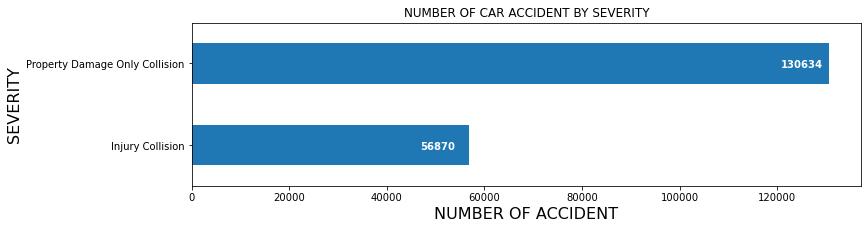

In [12]:

fig, ax = plt.subplots()


df3['SEVERITYDESC'].value_counts().plot.barh(ax=ax,figsize=(12,3), title="NUMBER OF CAR ACCIDENT BY SEVERITY", fontsize=10)
ax.set_xlabel("NUMBER OF ACCIDENT",fontsize=16)
ax.set_ylabel("SEVERITY",fontsize=16)


for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-10000, i.get_y()+.30,\
            str(i.get_width()), fontsize=10, color='white',fontweight='bold')

# invert for largest on top 
ax.invert_yaxis()


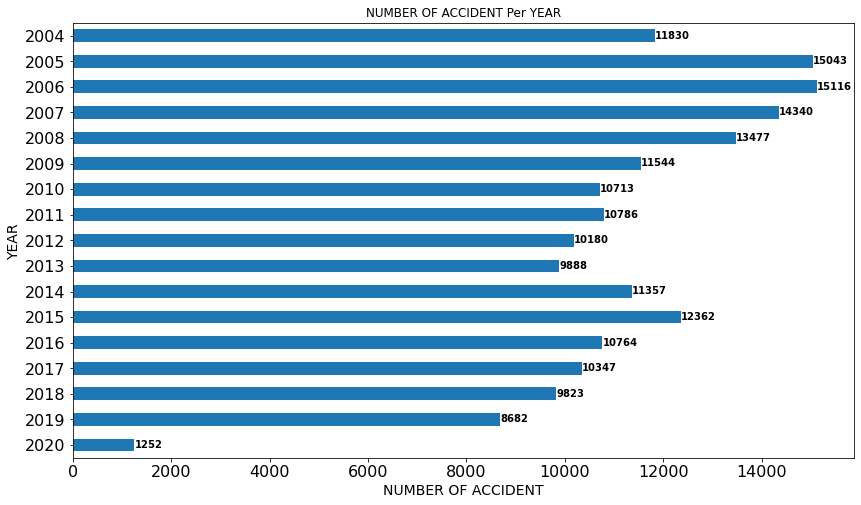

In [13]:
ax2 = df3.groupby('YEAR')['SEVERITYCODE'].count().plot.barh(figsize=(14,8),title="NUMBER OF ACCIDENT Per YEAR", fontsize=16)
ax2.set_xlabel("NUMBER OF ACCIDENT",fontsize=14)
ax2.set_ylabel("YEAR",fontsize=14)

for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(i.get_width()-0.10, i.get_y()+.35,\
            str(i.get_width()), fontsize=10, color='black',fontweight='bold')
ax2.invert_yaxis()

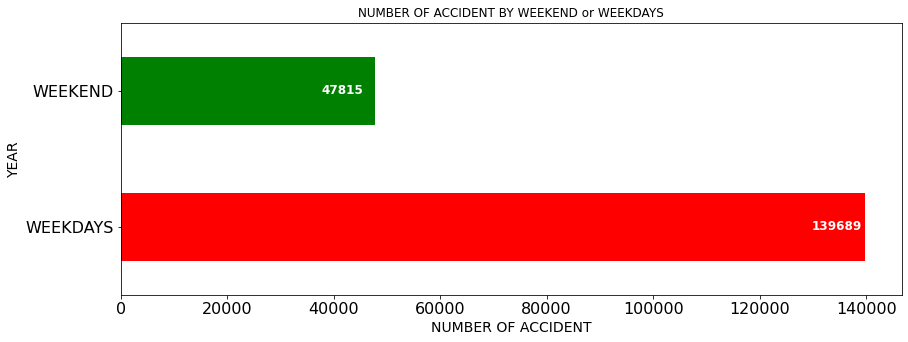

In [14]:

ax3 = df3['WEEKEND_DESCRIPTION'].value_counts().plot(kind='barh', figsize=(14,5), title="NUMBER OF ACCIDENT BY WEEKEND or WEEKDAYS", fontsize=16, 
               color=['red','green'])
ax3.set_xlabel("NUMBER OF ACCIDENT",fontsize=14)
ax3.set_ylabel("YEAR",fontsize=14)

for i in ax3.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax3.text(i.get_width()-10000, i.get_y()+.23,\
            str(i.get_width()), fontsize=10, color='white',fontweight='bold',size=12)

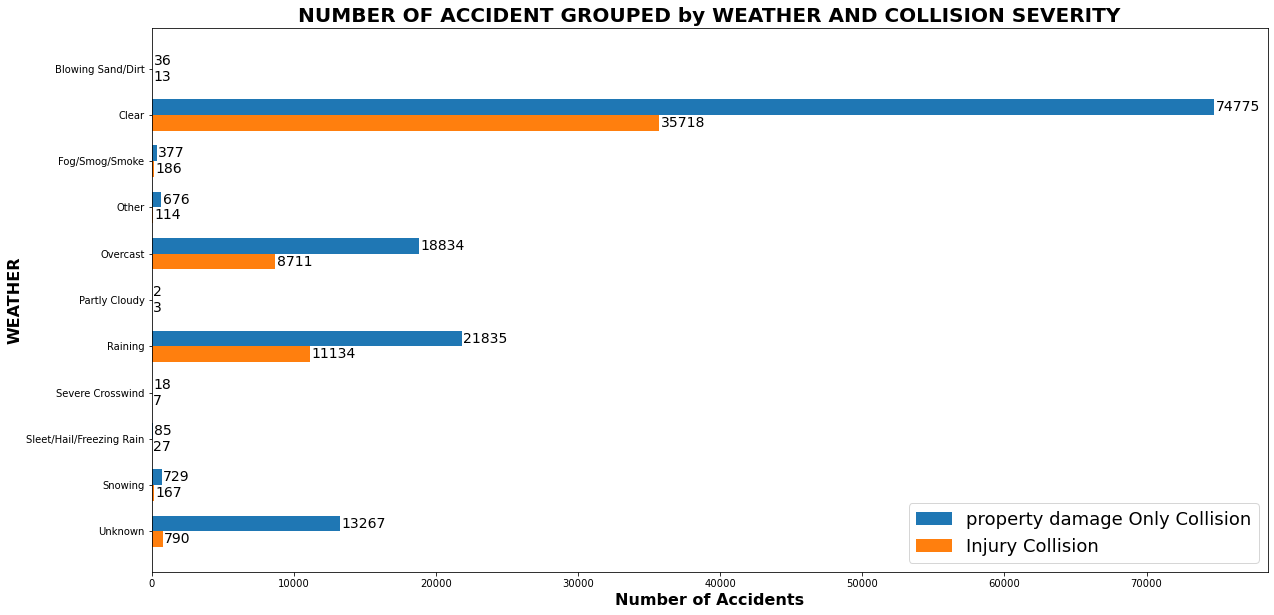

In [15]:
labels = sorted(df3['WEATHER'].unique())
property_damage_Only_Collision = list(df3.SEVERITYCODE.eq(1).astype('int').groupby(df3.WEATHER,sort=True).sum())
Injury_Collision = list(df3.SEVERITYCODE.eq(2).astype('int').groupby(df3.WEATHER,sort=True).sum())

y = np.arange(len(labels))  # the label locations
height = 0.34  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='property damage Only Collision')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Injury Collision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Accidents',size=16,fontweight='bold')
ax.set_ylabel('WEATHER',size=16,fontweight='bold')
ax.set_title('NUMBER OF ACCIDENT GROUPED by WEATHER AND COLLISION SEVERITY',size=20,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.26,\
            str(i.get_width()), fontsize=10, color='black',size=14,)

ax.invert_yaxis()
fig.set_size_inches(20,10)
plt.show()


['Alley', 'Block', 'Intersection']
[662, 93888, 36084]
[80, 29427, 27363]


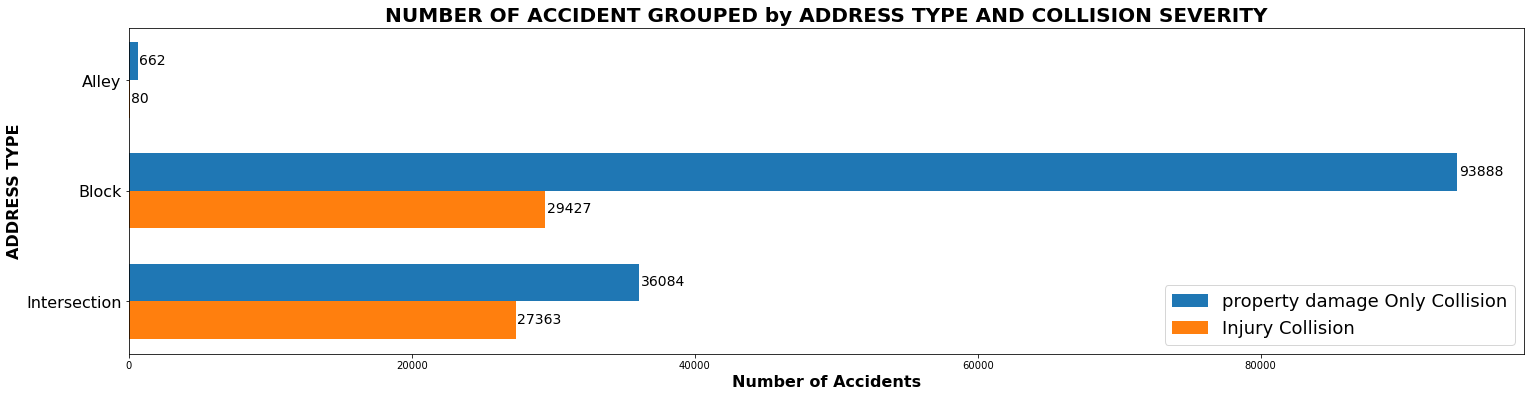

In [16]:
labels = sorted(df3['ADDRESS_TYPE'].unique())
property_damage_Only_Collision = list(df3.SEVERITYCODE.eq(1).astype('int').groupby(df3.ADDRESS_TYPE,sort=True).sum())
Injury_Collision = list(df3.SEVERITYCODE.eq(2).astype('int').groupby(df3.ADDRESS_TYPE,sort=True).sum())
print(labels)
print(property_damage_Only_Collision)
print(Injury_Collision)
y = np.arange(len(labels))  # the label locations
height = 0.34  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='property damage Only Collision')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Injury Collision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Accidents',size=16,fontweight='bold')
ax.set_ylabel('ADDRESS TYPE',size=16,fontweight='bold')
ax.set_title('NUMBER OF ACCIDENT GROUPED by ADDRESS TYPE AND COLLISION SEVERITY',size=20,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels,fontsize=16)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.20,\
            str(i.get_width()), fontsize=10, color='black',size=14,)

ax.invert_yaxis()
fig.set_size_inches(25,6)
plt.show()

['Angles', 'Cycles', 'Head On', 'Left Turn', 'Other', 'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe']
[20970, 668, 1142, 8259, 17375, 44031, 670, 19229, 2331, 15959]
[13585, 4731, 869, 5400, 6065, 2648, 5919, 14565, 605, 2483]


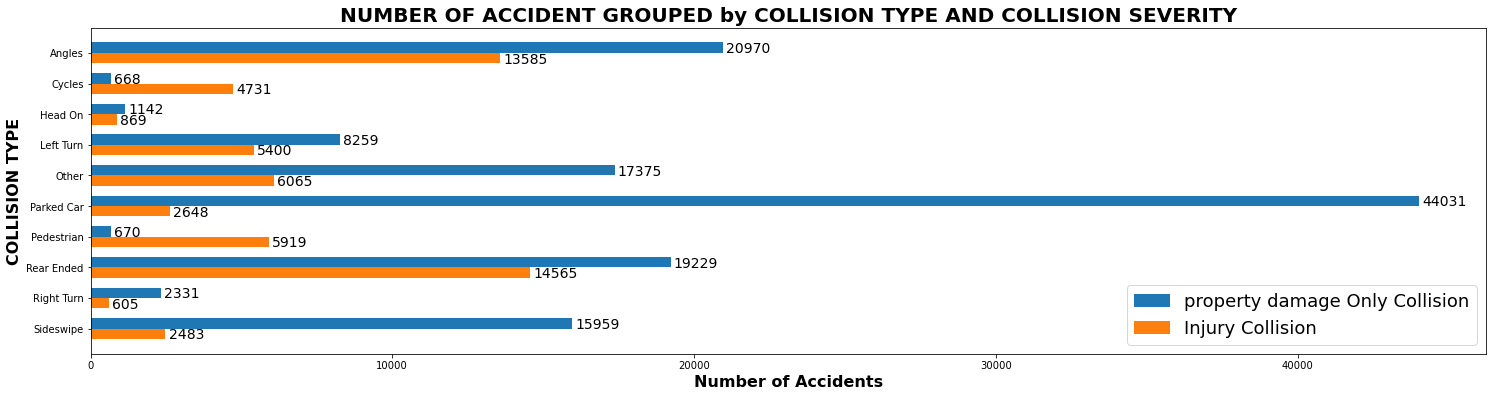

In [17]:
labels = sorted(df3['COLLISION_TYPE'].unique())
property_damage_Only_Collision = list(df3.SEVERITYCODE.eq(1).astype('int').groupby(df3.COLLISION_TYPE,sort=True).sum())
Injury_Collision = list(df3.SEVERITYCODE.eq(2).astype('int').groupby(df3.COLLISION_TYPE,sort=True).sum())
print(labels)
print(property_damage_Only_Collision)
print(Injury_Collision)
y = np.arange(len(labels))  # the label locations
height = 0.34  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='property damage Only Collision')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Injury Collision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Accidents',size=16,fontweight='bold')
ax.set_ylabel('COLLISION TYPE',size=16,fontweight='bold')
ax.set_title('NUMBER OF ACCIDENT GROUPED by COLLISION TYPE AND COLLISION SEVERITY',size=20,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.33,\
            str(i.get_width()), fontsize=10, color='black',size=14,)

ax.invert_yaxis()
fig.set_size_inches(25,6)
plt.show()

['N', 'Y']
[124875, 5759]
[53364, 3506]


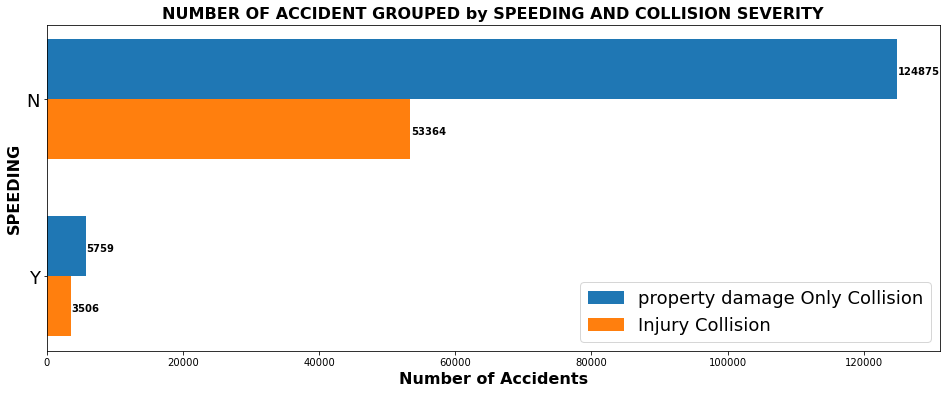

In [18]:
labels = sorted(df3['SPEEDING'].unique())
property_damage_Only_Collision = list(df3.SEVERITYCODE.eq(1).astype('int').groupby(df3.SPEEDING,sort=True).sum())
Injury_Collision = list(df3.SEVERITYCODE.eq(2).astype('int').groupby(df3.SPEEDING,sort=True).sum())
print(labels)
print(property_damage_Only_Collision)
print(Injury_Collision)
y = np.arange(len(labels))  # the label locations
height = 0.34  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='property damage Only Collision')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Injury Collision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Accidents',size=16,fontweight='bold')
ax.set_ylabel('SPEEDING',size=16,fontweight='bold')
ax.set_title('NUMBER OF ACCIDENT GROUPED by SPEEDING AND COLLISION SEVERITY',size=16,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels,fontsize=18)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.20,\
            str(i.get_width()), fontsize=10, color='black',size=10,fontweight='bold')

ax.invert_yaxis()
fig.set_size_inches(16,6)
plt.show()

['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet']
[83832, 923, 40, 82, 51, 827, 82, 13276, 31521]
[39898, 269, 24, 42, 22, 165, 29, 729, 15692]


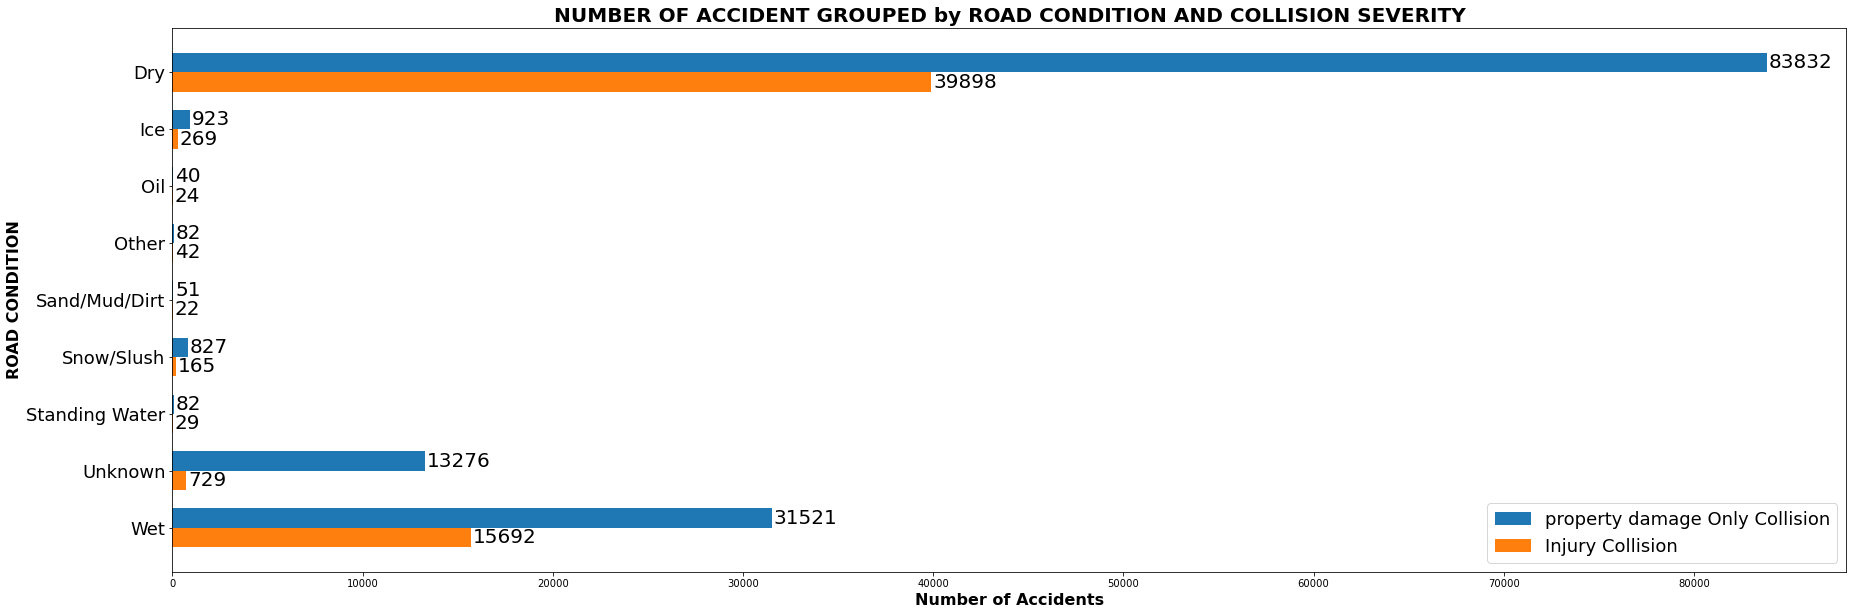

In [19]:
labels = sorted(df3['ROAD_CONDITION'].unique())
property_damage_Only_Collision = list(df3.SEVERITYCODE.eq(1).astype('int').groupby(df3.ROAD_CONDITION,sort=True).sum())
Injury_Collision = list(df3.SEVERITYCODE.eq(2).astype('int').groupby(df3.ROAD_CONDITION,sort=True).sum())
print(labels)
print(property_damage_Only_Collision)
print(Injury_Collision)
y = np.arange(len(labels))  # the label locations
height = 0.34  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='property damage Only Collision')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Injury Collision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Accidents',size=16,fontweight='bold')
ax.set_ylabel('ROAD CONDITION',size=16,fontweight='bold')
ax.set_title('NUMBER OF ACCIDENT GROUPED by ROAD CONDITION AND COLLISION SEVERITY',size=20,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels,fontsize=18)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.27,\
            str(i.get_width()), fontsize=20, color='black',size=20,)

ax.invert_yaxis()
fig.set_size_inches(30,10)
plt.show()

['N', 'Y']
[124875, 5759]
[53364, 3506]


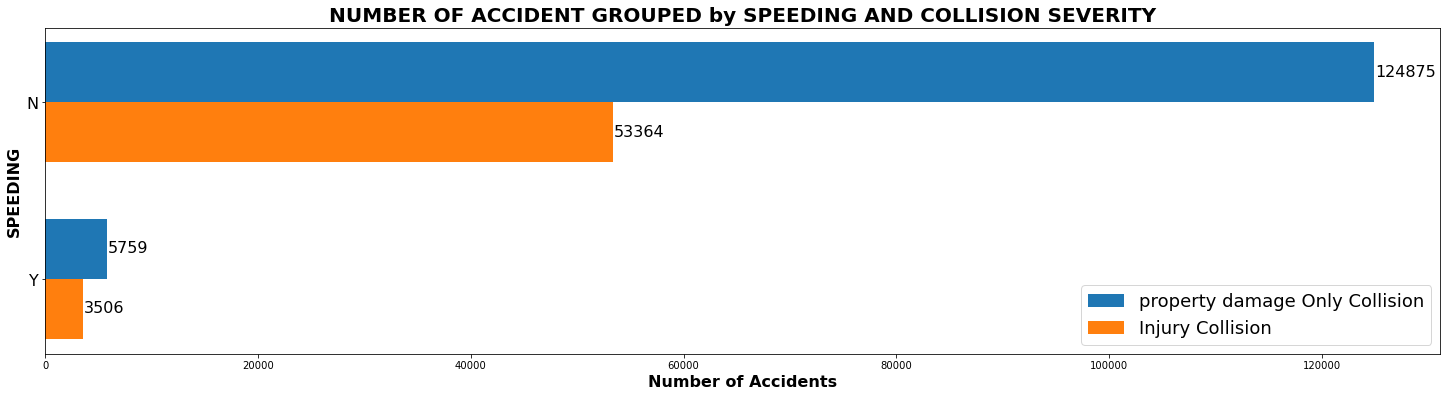

In [20]:
labels = sorted(df3['SPEEDING'].unique())
property_damage_Only_Collision = list(df3.SEVERITYCODE.eq(1).astype('int').groupby(df3.SPEEDING,sort=True).sum())
Injury_Collision = list(df3.SEVERITYCODE.eq(2).astype('int').groupby(df3.SPEEDING,sort=True).sum())
print(labels)
print(property_damage_Only_Collision)
print(Injury_Collision)
y = np.arange(len(labels))  # the label locations
height = 0.34  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='property damage Only Collision')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Injury Collision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Accidents',size=16,fontweight='bold')
ax.set_ylabel('SPEEDING',size=16,fontweight='bold')
ax.set_title('NUMBER OF ACCIDENT GROUPED by SPEEDING AND COLLISION SEVERITY',size=20,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels,fontsize=16)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.19,\
            str(i.get_width()), fontsize=16, color='black',size=16,)

ax.invert_yaxis()
fig.set_size_inches(25,6)
plt.show()

['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk', 'Other', 'Unknown']
[1191, 869, 33816, 7, 1667, 76995, 3906, 175, 12008]
[334, 315, 14417, 4, 823, 38400, 1936, 52, 589]


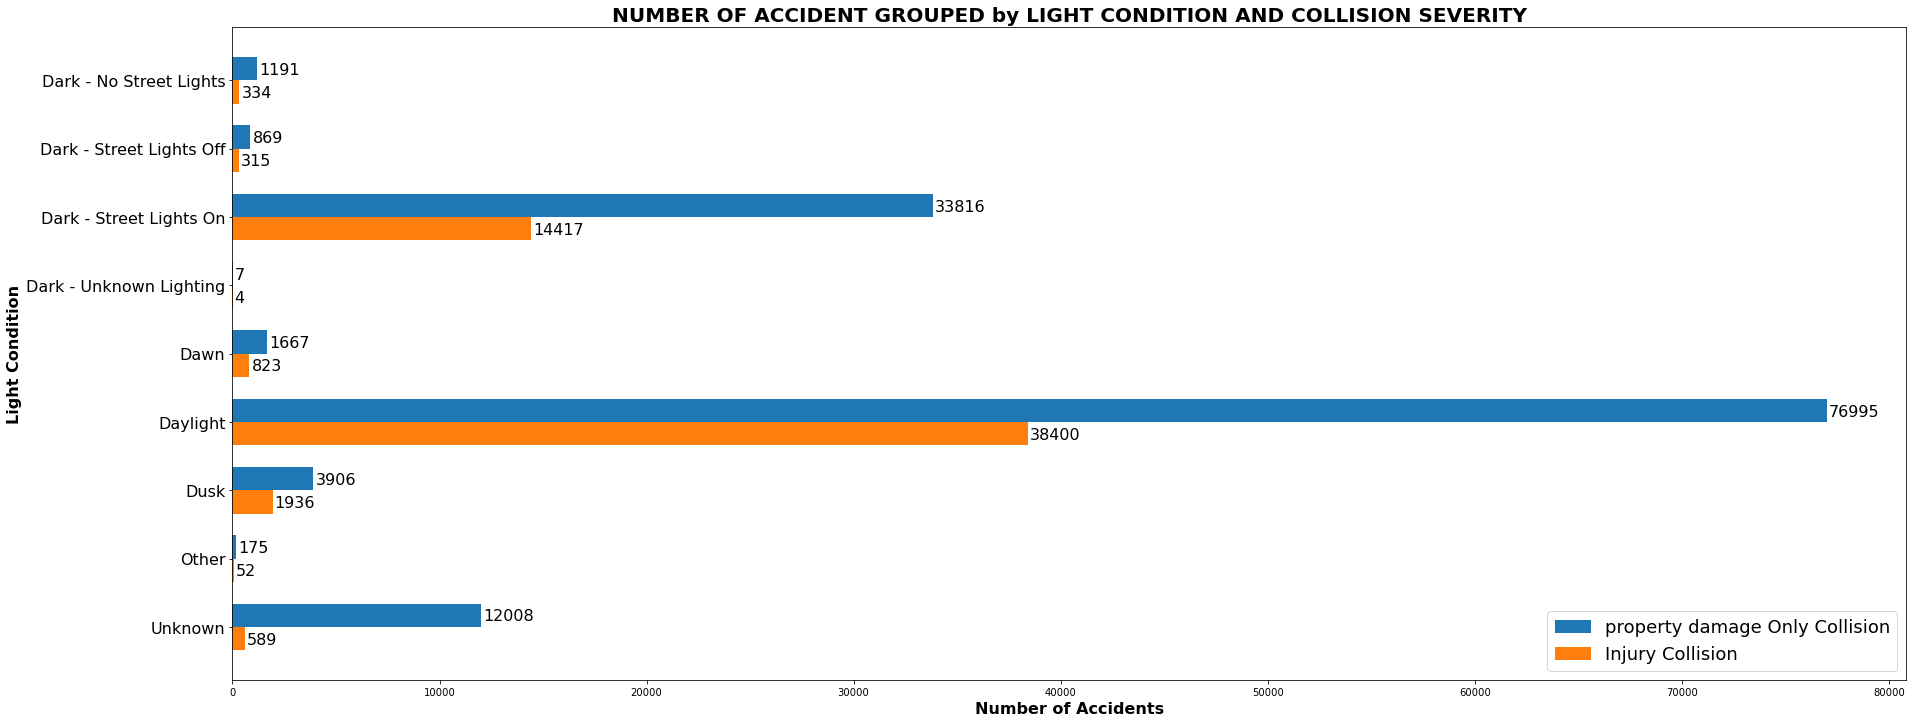

In [21]:
labels = sorted(df3['LIGHT_CONDITION'].unique())
property_damage_Only_Collision = list(df3.SEVERITYCODE.eq(1).astype('int').groupby(df3.LIGHT_CONDITION,sort=True).sum())
Injury_Collision = list(df3.SEVERITYCODE.eq(2).astype('int').groupby(df3.LIGHT_CONDITION,sort=True).sum())
print(labels)
print(property_damage_Only_Collision)
print(Injury_Collision)
y = np.arange(len(labels))  # the label locations
height = 0.34  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(y - height/2, property_damage_Only_Collision, height, label='property damage Only Collision')
rects2 = ax.barh(y + height/2, Injury_Collision, height, label='Injury Collision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Accidents',size=16,fontweight='bold')
ax.set_ylabel('Light Condition',size=16,fontweight='bold')
ax.set_title('NUMBER OF ACCIDENT GROUPED by LIGHT CONDITION AND COLLISION SEVERITY',size=20,fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(labels,fontsize=16)
ax.legend(loc=4,prop={'size': 18})

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.25,\
            str(i.get_width()), fontsize=16, color='black',size=16,)

ax.invert_yaxis()
fig.set_size_inches(30,12)
plt.show()

In [22]:

df3['SPEEDING_onehot'] = 0
df3.loc[df3['SPEEDING'].eq('Y'), 'SPEEDING_onehot'] = 1



In [23]:
df3

,SEVERITYCODE,ADDRESS_TYPE,SEVERITYDESC,COLLISION_TYPE,PERSON_COUNT,PEDESTRIANS_COUNT,BICYCLES_COUNT,VEHICLES_COUNT,JUNCTION_TYPE,SDOT_COLDESC,...,ROAD_CONDITION,LIGHT_CONDITION,PEDESTRIAN_RIGHT,SPEEDING,HIT_PARKED_CAR,DAY_OF_WEEK,YEAR,WEEKEND,WEEKEND_DESCRIPTION,SPEEDING_onehot
0,2,Intersection,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,Wet,Daylight,N,N,N,Wednesday,2013,0,WEEKDAYS,0
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",...,Wet,Dark - Street Lights On,N,N,N,Wednesday,2006,0,WEEKDAYS,0
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",...,Dry,Daylight,N,N,N,Thursday,2004,0,WEEKDAYS,0
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,Dry,Daylight,N,N,N,Friday,2013,0,WEEKDAYS,0
4,2,Intersection,Injury Collision,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,Wet,Daylight,N,N,N,Wednesday,2004,0,WEEKDAYS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187499,2,Block,Injury Collision,Head On,3,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,Dry,Daylight,N,N,N,Monday,2018,0,WEEKDAYS,0
187500,1,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",...,Wet,Daylight,N,N,N,Tuesday,2018,0,WEEKDAYS,0
187501,2,Intersection,Injury Collision,Left Turn,3,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,Dry,Daylight,N,N,N,Saturday,2019,1,WEEKEND,0
187502,2,Intersection,Injury Collision,Cycles,2,0,1,1,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,...,Dry,Dusk,N,N,N,Tuesday,2019,0,WEEKDAYS,0


In [24]:
df3 = df3.drop(['SPEEDING'], axis=1)

In [25]:
df3.dtypes

SEVERITYCODE           object
ADDRESS_TYPE           object
SEVERITYDESC           object
COLLISION_TYPE         object
PERSON_COUNT           object
PEDESTRIANS_COUNT      object
BICYCLES_COUNT         object
VEHICLES_COUNT         object
JUNCTION_TYPE          object
SDOT_COLDESC           object
INATTENTION            object
ALCHOL_DRAG            object
WEATHER                object
ROAD_CONDITION         object
LIGHT_CONDITION        object
PEDESTRIAN_RIGHT       object
HIT_PARKED_CAR         object
DAY_OF_WEEK            object
YEAR                   object
WEEKEND                object
WEEKEND_DESCRIPTION    object
SPEEDING_onehot         int64
dtype: object

In [26]:
Feature = df3[['WEEKEND','SPEEDING_onehot']]
Feature = pd.concat([Feature,pd.get_dummies(df3['ADDRESS_TYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df3['COLLISION_TYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df3['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df3['ROAD_CONDITION'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df3['LIGHT_CONDITION'])], axis=1)
Feature.head()

,WEEKEND,SPEEDING_onehot,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [27]:
X = Feature
y = df3['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.58506077, -0.22799291, -0.06303151, -1.38604602,  1.39831524,
         2.10386502, -0.17218516, -0.10412195, -0.28030339, -0.3779829 ,
        -0.57573269, -0.19084134, -0.46888759, -0.12612461, -0.33027904,
        -0.01616775, -1.19781846, -0.05487846, -0.06504668,  2.40981083,
        -0.00516399, -0.46189096, -0.01154765, -0.02444745, -0.06929292,
        -0.28468391, -1.39288634, -0.07998669, -0.01847817, -0.02572464,
        -0.01973516, -0.07292937, -0.024338  , -0.28411428,  1.72378901,
        -0.09055303, -0.07971611, -0.58849366, -0.00765956, -0.11601052,
         0.79049885, -0.17932826, -0.03481535, -0.26836753],
       [-0.58506077, -0.22799291, -0.06303151,  0.72147677, -0.71514632,
        -0.47531567, -0.17218516, -0.10412195, -0.28030339, -0.3779829 ,
        -0.57573269, -0.19084134, -0.46888759, -0.12612461,  3.02774289,
        -0.01616775, -1.19781846, -0.05487846, -0.06504668, -0.41497033,
        -0.00516399,  2.16501316, -0.01154765, -0.02444745, -0.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)



In [35]:
#1

Acc_list = []
j_list = []
f_list = []
l_list =[]
con =[]


for k in range(1,11):
    accident_SEVERITY = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    predicty = accident_SEVERITY.predict(X_test)
    predicty_p = accident_SEVERITY.predict_proba(X_test)
    acc = metrics.accuracy_score(y_test, predicty)
    j = metrics.jaccard_score(y_test, predicty,pos_label = 'Property Damage Only Collision')
    f = metrics.f1_score(y_test, predicty,average='weighted')
    l = metrics.log_loss(y_test,predicty_p)
    co = metrics.confusion_matrix(y_test, predicty)
    Acc_list.append(acc)
    j_list.append(j)
    f_list.append(f)
    l_list.append(l)
    con.append(co)
    
print(max(Acc_list))
print("the best k is : " + str(Acc_list.index(max(Acc_list))+1))
print(max(j_list))
print("the best k is : " + str(j_list.index(max(j_list))+1))
print(max(f_list))
print("the best k is : " + str(f_list.index(max(f_list))+1))
print(max(l_list))
print("the best k is : " + str(l_list.index(min(l_list))+1))

0.7200988409301002
the best k is : 9
0.6820511785598967
the best k is : 5
0.7116691936266913
the best k is : 7
11.849602603380882
the best k is : 10


In [38]:
print(min(l_list))
print("the best k is : " + str(l_list.index(min(l_list))+1))
print(Acc_list)
print(j_list)
print(f_list)
print(l_list)
print(con)

1.1697461369989002
the best k is : 10
[0.6569188651070185, 0.6252577686126716, 0.7065526559055678, 0.6889532816610965, 0.7199210694730854, 0.7059304558060158, 0.7148723600938633, 0.7092370049064922, 0.7200988409301002, 0.7131301998151177]
[0.6042367320154212, 0.5337830366028973, 0.6561256588129909, 0.6230475903225111, 0.6820511785598967, 0.6492738259302449, 0.6649257317149602, 0.6543971601233994, 0.6798234911338864, 0.6677373525233183]
[0.6575178275720783, 0.6401695500283946, 0.7038045676048309, 0.6955361256520709, 0.7045959358703603, 0.7074641916031174, 0.7116691936266913, 0.7095863986573683, 0.7076583287333015, 0.7060231852256222]
[11.849602603380882, 6.209777176533406, 3.907758605667331, 2.977663335640805, 2.193026626462115, 1.962454377528645, 1.7540495144044261, 1.455735306757846, 1.4040101971637877, 1.1697461369989002]
[array([[ 7488,  9543],
       [ 9756, 29465]]), array([[11037,  5994],
       [15086, 24135]]), array([[ 8249,  8782],
       [ 7725, 31496]]), array([[ 9835,  719

0.7148723600938633
0.6649257317149602
0.7116691936266913
1.7540495144044261
[[ 8385  8646]
 [ 7393 31828]]


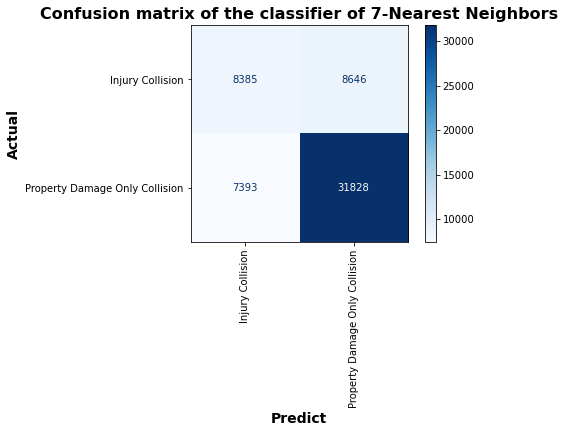

In [39]:
accident_SEVERITY1 = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
predicty1 = accident_SEVERITY1.predict(X_test)
predicty_p1 = accident_SEVERITY1.predict_proba(X_test)
acc1 = metrics.accuracy_score(y_test, predicty1)
j1 = metrics.jaccard_score(y_test, predicty1,pos_label = 'Property Damage Only Collision')
f1 = metrics.f1_score(y_test, predicty1,average='weighted')
l1 = metrics.log_loss(y_test,predicty_p1)
co1 = metrics.confusion_matrix(y_test, predicty1)

print(acc1)
print(j1)
print(f1)
print(l1)
print(co1)

plot_confusion_matrix(accident_SEVERITY1, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier of 7-Nearest Neighbors',size=16,fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Predict',size=14,fontweight='bold')
plt.ylabel('Actual',size=14,fontweight='bold')
plt.show()


0.7476889710588068
0.7323489477257298
0.684092367497749
0.5000567128321842
[[ 3224 13807]
 [  386 38835]]


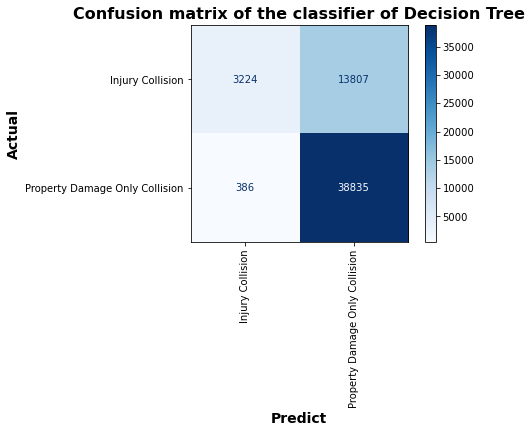

In [31]:
#2
accident_SEVERITY2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
accident_SEVERITY2.fit(X_train,y_train)
predTree = accident_SEVERITY2.predict(X_test)
predTree_p = accident_SEVERITY2.predict_proba(X_test)
acc2 = metrics.accuracy_score(y_test, predTree)
j2 = metrics.jaccard_score(y_test, predTree, pos_label = 'Property Damage Only Collision')
f2 = metrics.f1_score(y_test, predTree,average='weighted')
l2 = metrics.log_loss(y_test,predTree_p)
con2 = metrics.confusion_matrix(y_test, predTree)

print(acc2)
print(j2)
print(f2)
print(l2)
print(con2)

plot_confusion_matrix(accident_SEVERITY2, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier of Decision Tree',size=16,fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Predict',size=14,fontweight='bold')
plt.ylabel('Actual',size=14,fontweight='bold')
plt.show()

0.7474578681646875
0.729780111085749
0.6916437485044974
0.4913464958659431
[[ 3680 13351]
 [  855 38366]]


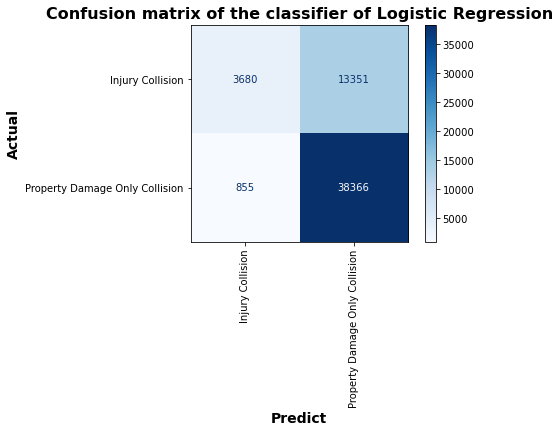

In [32]:
#3
accident_SEVERITY3 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhat3 = accident_SEVERITY3.predict(X_test)
yhat3_p = accident_SEVERITY3.predict_proba(X_test)
acc3 = metrics.accuracy_score(y_test, yhat3)
j3 = metrics.jaccard_score(y_test, yhat3,pos_label = 'Property Damage Only Collision')
f3 = metrics.f1_score(y_test, yhat3,average='weighted')
l3 = metrics.log_loss(y_test, yhat3_p)
labels = df3['SEVERITYDESC'].unique
con3 = metrics.confusion_matrix(y_test, yhat3)

print(acc3)
print(j3)
print(f3)
print(l3)
print(con3)


plot_confusion_matrix(accident_SEVERITY3, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier of Logistic Regression',size=16,fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Predict',size=14,fontweight='bold')
plt.ylabel('Actual',size=14,fontweight='bold')
plt.show()



0.7446668562895542
0.7266273315569091
0.6900129934076598
0.5499273935767164
[[ 3712 13319]
 [ 1044 38177]]


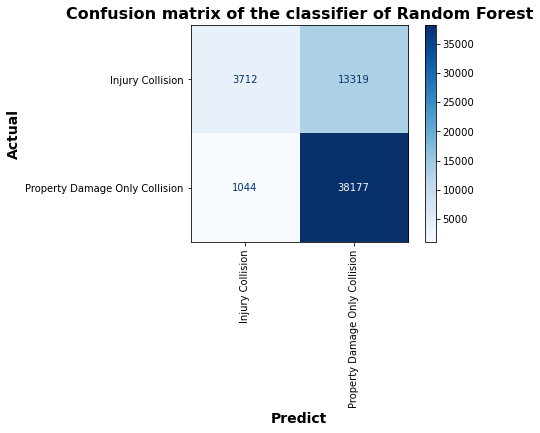

In [33]:
#4

from sklearn.ensemble import RandomForestClassifier

accident_SEVERITY4 = RandomForestClassiprint(n_estimators=10)
accident_SEVERITY4.fit(X_train,y_train)
yhat4 = accident_SEVERITY4.predict(X_test)
yhat4_p = accident_SEVERITY4.predict_proba(X_test)
acc4 = metrics.accuracy_score(y_test, yhat4)
j4 = metrics.jaccard_score(y_test, yhat4,pos_label = 'Property Damage Only Collision')
f4 = metrics.f1_score(y_test, yhat4,average='weighted')
l4 = metrics.log_loss(y_test, yhat4_p)
con4 = metrics.confusion_matrix(y_test, yhat4)

print(acc4)
print(j4)
print(f4)
print(l4)
print(con4)

plot_confusion_matrix(accident_SEVERITY4, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier of Random Forest',size=16,fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Predict',size=14,fontweight='bold')
plt.ylabel('Actual',size=14,fontweight='bold')
plt.show()

0.6207245964587925
0.48618837752570865
0.6317761472547747
2.2266467718857164
[[14729  2302]
 [19033 20188]]


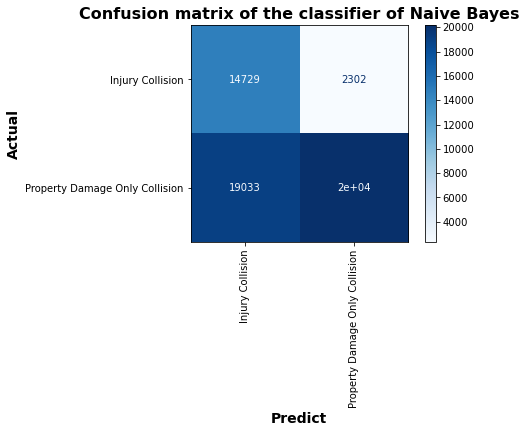

In [34]:
#5
from sklearn.naive_bayes import GaussianNB

accident_SEVERITY5 = GaussianNB()
accident_SEVERITY5.fit(X_train, y_train)
yhat5 = accident_SEVERITY5.predict(X_test)
yhat5_p = accident_SEVERITY5.predict_proba(X_test)
acc5 = metrics.accuracy_score(y_test, yhat5)
j5 = metrics.jaccard_score(y_test, yhat5,pos_label = 'Property Damage Only Collision')
f5 = metrics.f1_score(y_test, yhat5,average='weighted')
l5 = metrics.log_loss(y_test,yhat5_p)
con5 = metrics.confusion_matrix(y_test, yhat5)

print(acc5)
print(j5)
print(f5)
print(l5)
print(con5)

plot_confusion_matrix(accident_SEVERITY5, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier of Naive Bayes',size=16,fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Predict',size=14,fontweight='bold')
plt.ylabel('Actual',size=14,fontweight='bold')
plt.show()

0.7479200739529261
0.7316630080993112
0.6874809269312943
0.5595145670869284
[[ 3408 13623]
 [  557 38664]]


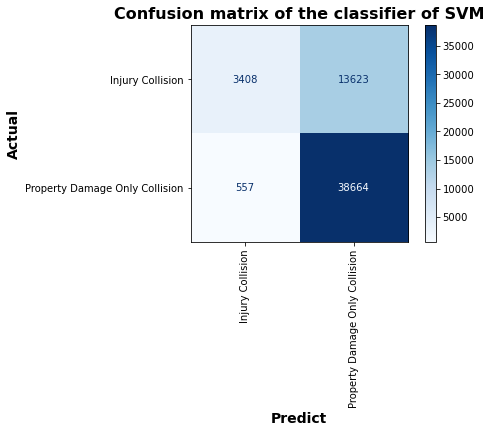

In [37]:
#6

accident_SEVERITY = svm.SVC(kernel='rbf',probability=True)
accident_SEVERITY.fit(X_train,y_train)
yhat6 = accident_SEVERITY.predict(X_test)
yhat6_pr = accident_SEVERITY.predict_proba(X_test)
acc6 = metrics.accuracy_score(y_test, yhat6)
j6 = metrics.jaccard_score(y_test, yhat6,pos_label = 'Property Damage Only Collision')
f6 = metrics.f1_score(y_test, yhat6,average='weighted')
l6 = metrics.log_loss(y_test,yhat6_pr)
con6 = metrics.confusion_matrix(y_test, yhat6)

print(acc6)
print(j6)
print(f6)
print(l6)
print(con6)

plot_confusion_matrix(accident_SEVERITY, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier of SVM',size=16,fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Predict',size=14,fontweight='bold')
plt.ylabel('Actual',size=14,fontweight='bold')
plt.show()